# H1B dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
h1b=pd.read_csv("H1B.csv")

### Overview of the data

In [5]:
h1b.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [6]:
h1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1048575 non-null  int64  
 1   CASE_STATUS         1048575 non-null  object 
 2   EMPLOYER_NAME       1048556 non-null  object 
 3   SOC_NAME            1048564 non-null  object 
 4   JOB_TITLE           1048567 non-null  object 
 5   FULL_TIME_POSITION  1048574 non-null  object 
 6   PREVAILING_WAGE     1048571 non-null  float64
 7   YEAR                1048575 non-null  int64  
 8   WORKSITE            1048575 non-null  object 
 9   lon                 1019007 non-null  float64
 10  lat                 1019007 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 88.0+ MB


### Data Cleansing

In [8]:
h1b.isnull().sum()

Unnamed: 0                0
CASE_STATUS               0
EMPLOYER_NAME            19
SOC_NAME                 11
JOB_TITLE                 8
FULL_TIME_POSITION        1
PREVAILING_WAGE           4
YEAR                      0
WORKSITE                  0
lon                   29568
lat                   29568
dtype: int64

In [13]:
h1b=h1b.dropna()

In [14]:
h1b.isnull().sum()

Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

### Analysis of the Dataset

In [25]:
# Petition distributed by case statuses
print(h1b['CASE_STATUS'].unique())

['CERTIFIED-WITHDRAWN' 'WITHDRAWN' 'CERTIFIED' 'DENIED']


In [30]:
# Top employers filing the petitions
h1b['EMPLOYER_NAME'].value_counts()

INFOSYS LIMITED                      48608
TATA CONSULTANCY SERVICES LIMITED    22925
IBM INDIA PRIVATE LIMITED            18859
WIPRO LIMITED                        18497
CAPGEMINI AMERICA INC                16628
                                     ...  
ODIS INC.                                1
PEAK DEMAND, INC.                        1
ADMEDES INC.                             1
HAHN AUTOMATION, INC.                    1
KENNARD                                  1
Name: EMPLOYER_NAME, Length: 92675, dtype: int64

In [29]:
# Top 15 companies that filed the most visa application
h1b['EMPLOYER_NAME'].value_counts()[0:15]

INFOSYS LIMITED                                    48608
TATA CONSULTANCY SERVICES LIMITED                  22925
IBM INDIA PRIVATE LIMITED                          18859
WIPRO LIMITED                                      18497
CAPGEMINI AMERICA INC                              16628
ACCENTURE LLP                                      15882
DELOITTE CONSULTING LLP                            11877
TECH MAHINDRA (AMERICAS),INC.                       9133
HCL AMERICA, INC.                                   8795
MICROSOFT CORPORATION                               8104
ERNST & YOUNG U.S. LLP                              7339
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     7322
GOOGLE INC.                                         7296
IGATE TECHNOLOGIES INC.                             5220
LARSEN & TOUBRO INFOTECH LIMITED                    4549
Name: EMPLOYER_NAME, dtype: int64

In [86]:
# Top employers granting maximum prevailing wages
print(h1b.sort_values(by="PREVAILING_WAGE",ascending=False)[['EMPLOYER_NAME','PREVAILING_WAGE']][0:5].reset_index())

    index                        EMPLOYER_NAME  PREVAILING_WAGE
0    5579                   E AND D MEDIA INC.      329139200.0
1  633103  U.S. DEPARTMENT OF VETERANS AFFAIRS      311804480.0
2  813742             FRANCISCAN HEALTH SYSTEM      306741760.0
3  774072             FRANCISCAN HEALTH SYSTEM      306741760.0
4   10954           TERRALOGIC SOLUTIONS, INC.      259496640.0


In [93]:
# Top 20 states filing highest visa petitions
h1b['WORKSITE'].str.split(',').str[1].value_counts()[0:20]

 CALIFORNIA        192930
 TEXAS             107841
 NEW YORK           90022
 NEW JERSEY         80967
 ILLINOIS           55159
 GEORGIA            39563
 MASSACHUSETTS      38899
 WASHINGTON         36187
 PENNSYLVANIA       35457
 FLORIDA            32967
 MICHIGAN           32221
 VIRGINIA           31298
 NORTH CAROLINA     28597
 OHIO               25453
 MARYLAND           16835
 CONNECTICUT        16113
 MINNESOTA          15487
 ARIZONA            14684
 MISSOURI           11922
 WISCONSIN          10892
Name: WORKSITE, dtype: int64

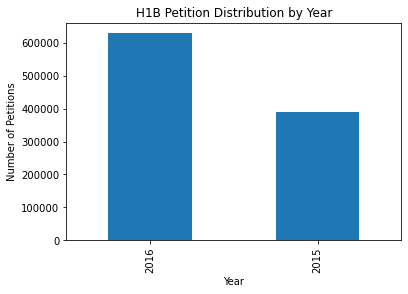

In [119]:
# Petition distribution by year
h1b['YEAR'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Petitions')
plt.title('H1B Petition Distribution by Year')
plt.show()

In [197]:
# Number of visa petitions denied
h1b['CASE_STATUS'].value_counts().loc['DENIED']

14496

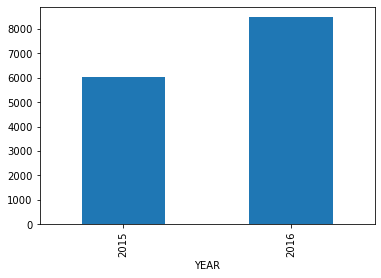

In [204]:
# Rate of visas denied from last 5 years
h=h1b[h1b['CASE_STATUS'] == 'DENIED'].groupby('YEAR').size()
h.plot(x='YEAR',y=h,kind='bar')
plt.show()

In [129]:
# Number of visa petitions filed by states
h1b['WORKSITE'].str.split(',').str[1].value_counts()

 CALIFORNIA              192930
 TEXAS                   107841
 NEW YORK                 90022
 NEW JERSEY               80967
 ILLINOIS                 55159
 GEORGIA                  39563
 MASSACHUSETTS            38899
 WASHINGTON               36187
 PENNSYLVANIA             35457
 FLORIDA                  32967
 MICHIGAN                 32221
 VIRGINIA                 31298
 NORTH CAROLINA           28597
 OHIO                     25453
 MARYLAND                 16835
 CONNECTICUT              16113
 MINNESOTA                15487
 ARIZONA                  14684
 MISSOURI                 11922
 WISCONSIN                10892
 COLORADO                 10410
 INDIANA                   9659
 TENNESSEE                 8358
 OREGON                    7595
 DISTRICT OF COLUMBIA      6552
 DELAWARE                  5888
 ARKANSAS                  4941
 IOWA                      4532
 UTAH                      4393
 SOUTH CAROLINA            4263
 RHODE ISLAND              4119
 KANSAS 

In [154]:
# Rate of denial of visa petition by the states
h=h1b['CASE_STATUS']=='DENIED'
h.groupby(h1b['WORKSITE'].str.split(',').str[1]).size()

WORKSITE
 ALABAMA                   2817
 ALASKA                     272
 ARIZONA                  14684
 ARKANSAS                  4941
 CALIFORNIA              192930
 COLORADO                 10410
 CONNECTICUT              16113
 DELAWARE                  5888
 DISTRICT OF COLUMBIA      6552
 FLORIDA                  32967
 GEORGIA                  39563
 HAWAII                     781
 IDAHO                     1289
 ILLINOIS                 55159
 INDIANA                   9659
 IOWA                      4532
 KANSAS                    4040
 KENTUCKY                  3688
 LOUISIANA                 3730
 MAINE                      930
 MARYLAND                 16835
 MASSACHUSETTS            38899
 MICHIGAN                 32221
 MINNESOTA                15487
 MISSISSIPPI                813
 MISSOURI                 11922
 MONTANA                    224
 NA                         889
 NEBRASKA                  3009
 NEVADA                    2121
 NEW HAMPSHIRE             3093

In [155]:
# Top 25 job titles
h1b['JOB_TITLE'].value_counts()[0:25]

PROGRAMMER ANALYST             90361
SOFTWARE ENGINEER              48691
SOFTWARE DEVELOPER             20973
COMPUTER PROGRAMMER            20627
SYSTEMS ANALYST                20368
BUSINESS ANALYST               15250
COMPUTER SYSTEMS ANALYST       12212
TECHNOLOGY LEAD - US           10515
TECHNOLOGY ANALYST - US        10194
SENIOR SOFTWARE ENGINEER        9843
DEVELOPER                       8650
CONSULTANT                      8387
PROJECT MANAGER                 7490
SENIOR CONSULTANT               6819
ASSISTANT PROFESSOR             6786
DATABASE ADMINISTRATOR          6187
ANALYST                         4741
SYSTEMS ENGINEER - US           4698
LEAD ENGINEER                   4672
COMPUTER PROGRAMMER ANALYST     4387
ASSOCIATE                       4350
DEVELOPER USER INTERFACE        4343
ACCOUNTANT                      3835
SENIOR SOFTWARE DEVELOPER       3814
APPLICATION DEVELOPER           3628
Name: JOB_TITLE, dtype: int64

In [163]:
# Top 10 occupations with the highest wages
h1b.sort_values('PREVAILING_WAGE',ascending=False)[['JOB_TITLE','PREVAILING_WAGE']][0:10].reset_index()

,index,JOB_TITLE,PREVAILING_WAGE
0,5579,"DIRECTOR, SOCIAL AND DIGITAL MEDIA",329139200.0
1,633103,PHYSICIAN,311804480.0
2,813742,HOSPITALIST,306741760.0
3,774072,HOSPITALIST,306741760.0
4,10954,QA MANAGER,259496640.0
5,812949,"MANAGER, INFORMATION TECHNOLOGY",252141760.0
6,19772,GLOBAL BUSINESS MANAGER,251796480.0
7,943261,BUSINESS ANALYST,242971040.0
8,691658,STAFF DIGITAL VERIFICATION ENGINEER,221555360.0
9,295778,SR SALESFORCE DEVELOPER,218915840.0


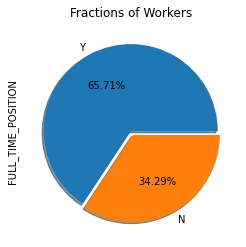

In [188]:
# To analyse the fraction of full-time and part-time workers
h1b['FULL_TIME_POSITION'].value_counts().plot(kind="pie",explode=[0, 0.05],autopct="%.2f%%",shadow=True)
plt.title("Fractions of Workers")
plt.show()